In [1]:
#importing required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.utils import image_dataset_from_directory as idfd
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

2023-05-05 10:47:41.922386: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_path = '/Users/omid/Desktop/data/'
train_data_path = '/Users/omid/Desktop/data/Train'
train_label_path = '/Users/omid/Desktop/data/Train_data_label.xlsx'
test_label_path = '/Users/omid/Desktop/data/Test_data_label.xlsx'
test_data_path = '/Users/omid/Desktop/data/Test/'

#reading train labels

train_labels = pd.read_excel(train_label_path)
test_labels = pd.read_excel(test_label_path)


In [3]:
train_labels.head()

,ClassId,Path
0,20,Train/20/00020_00000_00000.png
1,20,Train/20/00020_00000_00001.png
2,20,Train/20/00020_00000_00002.png
3,20,Train/20/00020_00000_00003.png
4,20,Train/20/00020_00000_00004.png


In [4]:
#load images from directory into np array format

import os
from PIL import Image, ImageOps
    
def load_image(directory):
    images = []
    for x in train_labels.index:
        image = Image.open(os.path.join(directory, train_labels.loc[x, "Path"]))
        if image is not None:
            images.append(np.array(image))
        image.close()
    return images

def load_test(directory):
    images = []
    for x in os.listdir(directory):
        try:
            image = Image.open(os.path.join(directory, x))
        except:
            continue
        if image is not None:
            images.append(np.array(image))
        image.close()
    return images

def load_test_wlabel(directory):
    images = []
    for x in test_labels.index:
        image = Image.open(os.path.join(directory, test_labels.loc[x, "Path"]))
        if image is not None:
            images.append(np.array(image))
        image.close()
    return images

In [5]:
train_images = load_image(data_path)
test_images = load_test(test_data_path)
ltest_images = load_test_wlabel(data_path)

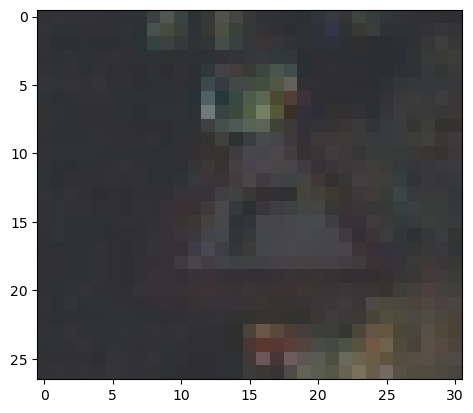

In [6]:
plt.imshow(train_images[5])

In [7]:
#Resize all images to 30x30
def resize(train_images):
    for x in range(len(train_images)):
        im = Image.fromarray(train_images[x])
        im = im.resize((30, 30))
        train_images[x] = np.array(im)
        im.close()

In [8]:
resize(train_images)
train_images[0].shape

(30, 30, 3)

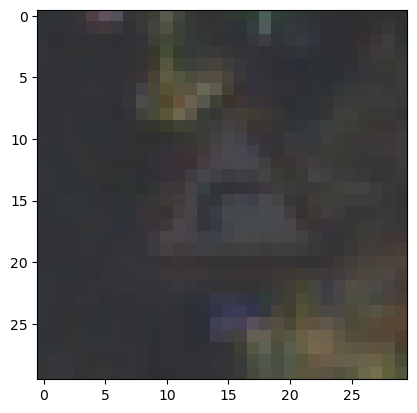

In [9]:
plt.imshow(train_images[0])

In [11]:
#turns images to grayscale for grayscale CNN model

def gray_scale(train):
    grays= []
    for x in range(len(train)):
        im = Image.fromarray(train[x])
        im = ImageOps.grayscale(im)
        t = np.array(im)
        grays.append(t)
        im.close()
    return grays

In [12]:
#Saving the color and grayscale image array in np array format
color_img_arr = np.array(train_images)
grayscale_img_arr = np.array(gray_scale(train_images))

In [13]:
#Target value
y = train_labels['ClassId'].values
print(y)

[20 20 20 ... 42 42 42]


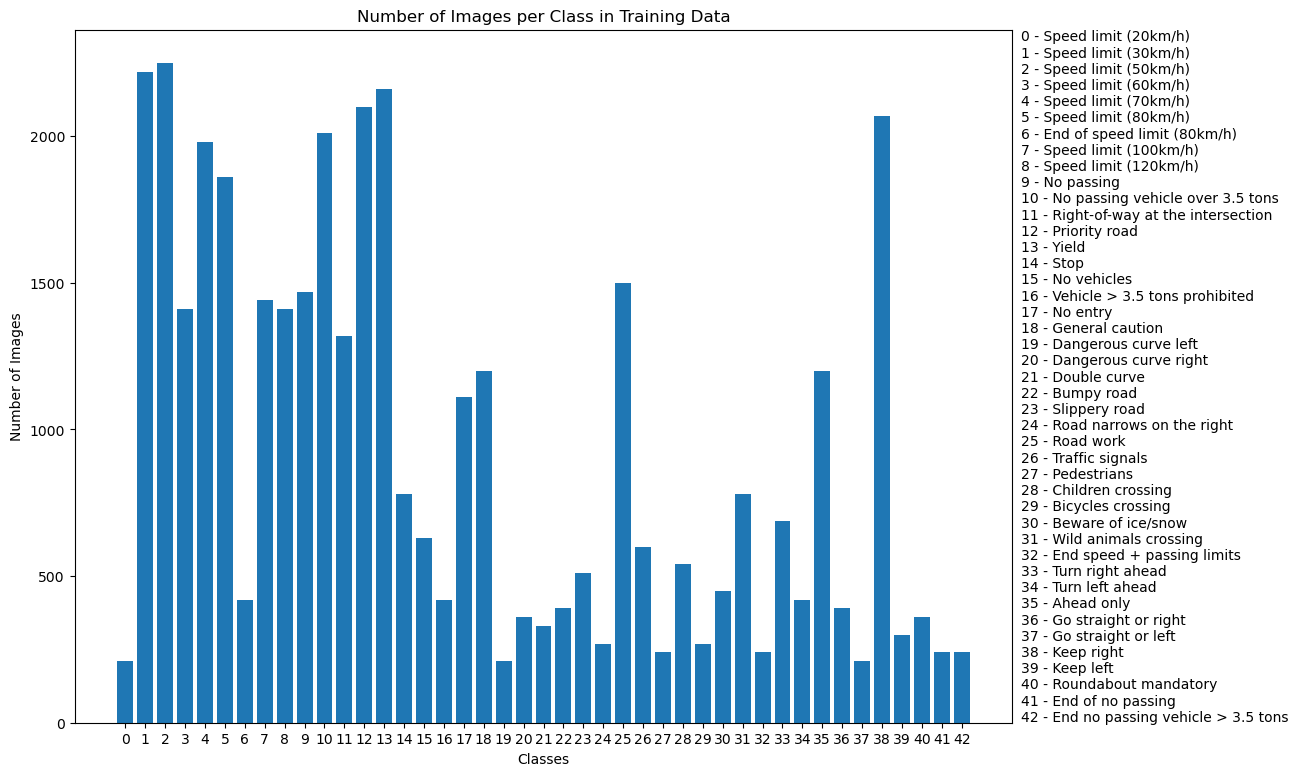

In [14]:
#Plotting Bar Chart of Classes from train and test data by replacing numbers with actual class names
classes = ["Speed limit (20km/h)", "Speed limit (30km/h)", "Speed limit (50km/h)", "Speed limit (60km/h)", "Speed limit (70km/h)" 
, "Speed limit (80km/h)", "End of speed limit (80km/h)", "Speed limit (100km/h)", "Speed limit (120km/h)", "No passing", "No passing vehicle over 3.5 tons" 
, "Right-of-way at the intersection", "Priority road", "Yield", "Stop", "No vehicles", "Vehicle > 3.5 tons prohibited", "No entry", 
"General caution", "Dangerous curve left", "Dangerous curve right", "Double curve", "Bumpy road", "Slippery road", "Road narrows on the right", 
"Road work", "Traffic signals", "Pedestrians", "Children crossing", "Bicycles crossing", "Beware of ice/snow", "Wild animals crossing", 
"End speed + passing limits", "Turn right ahead", "Turn left ahead", "Ahead only", "Go straight or right", "Go straight or left", 
"Keep right", "Keep left", "Roundabout mandatory", "End of no passing", "End no passing vehicle > 3.5 tons"]

fig = plt.figure(figsize = (25,9))
vc = train_labels["ClassId"].value_counts().sort_index()
plt.bar(vc.index,vc.values)
class_legend = ('\n').join(f'{ids} - {classe}' for ids,classe in zip(vc.index,classes))
plt.text(45, 5, class_legend)
plt.subplots_adjust(right=.5)
plt.xticks(vc.index)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class in Training Data")
plt.show()

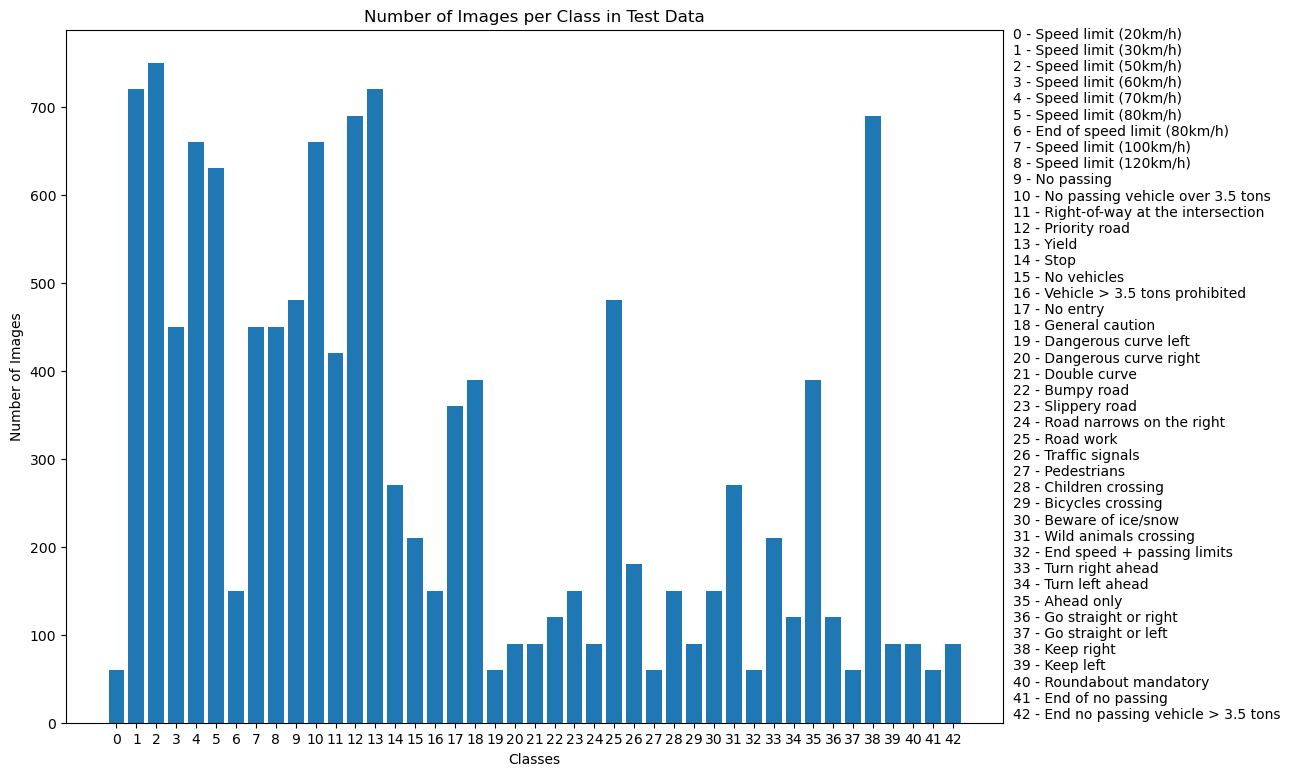

In [15]:
fig = plt.figure(figsize = (25,9))
vc = test_labels["ClassId"].value_counts().sort_index()
plt.bar(vc.index,vc.values)
class_legend = ('\n').join(f'{ids} - {classe}' for ids,classe in zip(vc.index,classes))
plt.text(45, 5, class_legend)
plt.subplots_adjust(right=.5)
plt.xticks(vc.index)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class in Test Data")
plt.show()

15


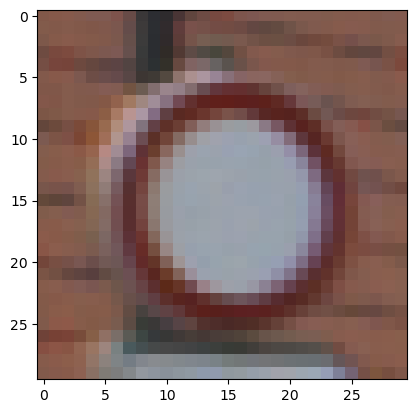

In [16]:
#Split Color Array Data into Train and Test
CX_train, CX_val, Cy_train, Cy_val = train_test_split(color_img_arr, y, random_state=42)

plt.imshow(CX_train[0])
print(Cy_train[0])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

#create Color model

model = Sequential()
#add model layers
model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(30,30,3)))
model.add(Conv2D(32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

early_stop = EarlyStopping(patience=2, monitor='val_loss')

2023-05-05 10:50:45.439915: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [20]:
colors = model.fit(CX_train, Cy_train, epochs=5, validation_data=(CX_val, Cy_val), callbacks=[early_stop])

Epoch 1/5
919/919 [==============================] - 105s 113ms/step - loss: 1.9554 - accuracy: 0.5097 - val_loss: 0.3813 - val_accuracy: 0.9180
Epoch 2/5
919/919 [==============================] - 115s 125ms/step - loss: 0.5928 - accuracy: 0.8272 - val_loss: 0.1830 - val_accuracy: 0.9557
Epoch 3/5
919/919 [==============================] - 96s 104ms/step - loss: 0.4067 - accuracy: 0.8828 - val_loss: 0.1049 - val_accuracy: 0.9727
Epoch 4/5
919/919 [==============================] - 113s 123ms/step - loss: 0.3501 - accuracy: 0.8986 - val_loss: 0.0844 - val_accuracy: 0.9789
Epoch 5/5
919/919 [==============================] - 129s 141ms/step - loss: 0.3062 - accuracy: 0.9135 - val_loss: 0.0979 - val_accuracy: 0.9728


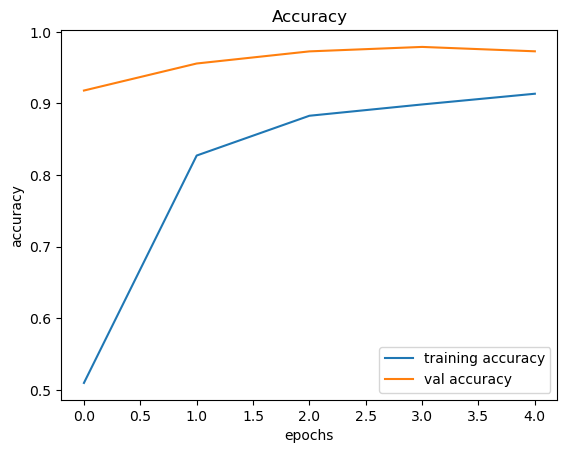

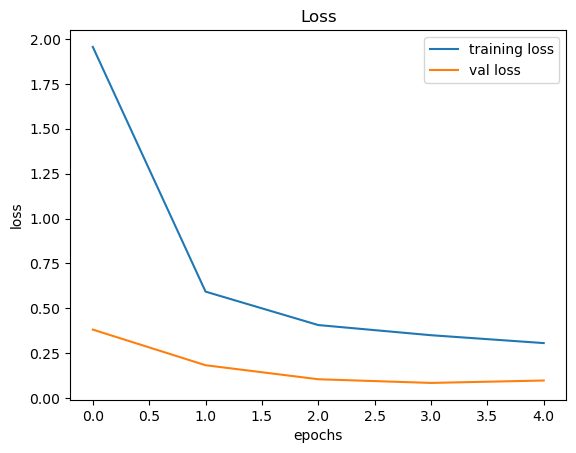

In [21]:
#Plotting training and validation accuracy of Color Image CNN Model

plt.figure(0)
plt.plot(colors.history['accuracy'], label='training accuracy')
plt.plot(colors.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(colors.history['loss'], label='training loss')
plt.plot(colors.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [50]:
#Evaluate with Test Data

resize(ltest_images)

CX_test = np.array(ltest_images)
Cy_test = test_labels['ClassId'].values

score = model.evaluate(CX_test, Cy_test)


395/395 [==============================] - 9s 23ms/step - loss: 0.2624 - accuracy: 0.9297


In [51]:
#Make Predictions with color CNN model

predictions = model.predict(CX_test)
pred_class = np.argmax(predictions, axis=1)
print(pred_class)

395/395 [==============================] - 11s 28ms/step
[16  1 38 ... 15  7 10]


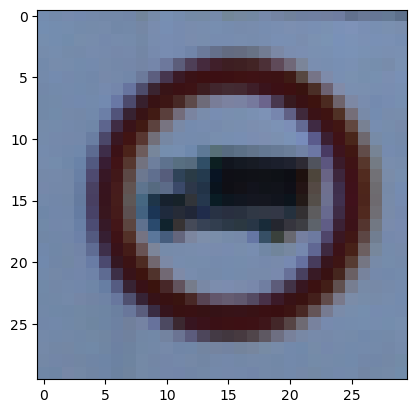

In [52]:
plt.imshow(CX_test[0])

In [53]:
#Evaluating Predictions
from sklearn.metrics import classification_report

print(classification_report(Cy_test, pred_class))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        60
           1       0.97      0.89      0.93       720
           2       0.97      0.97      0.97       750
           3       0.92      0.90      0.91       450
           4       0.83      0.97      0.89       660
           5       0.90      0.91      0.91       630
           6       0.98      0.82      0.89       150
           7       0.98      0.89      0.93       450
           8       0.90      0.94      0.92       450
           9       0.94      0.97      0.96       480
          10       0.98      0.98      0.98       660
          11       0.79      0.96      0.87       420
          12       0.98      0.93      0.95       690
          13       0.94      0.98      0.96       720
          14       0.96      0.99      0.98       270
          15       0.81      0.99      0.89       210
          16       0.99      0.98      0.98       150
          17       1.00    

15


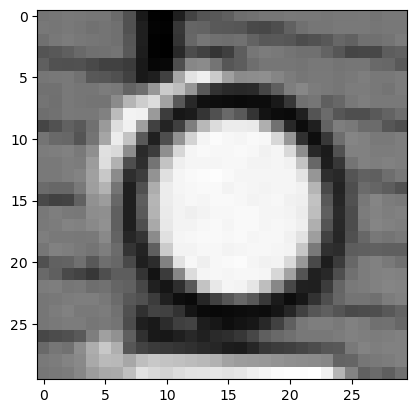

In [32]:
GX_train, GX_val, Gy_train, Gy_val = train_test_split(grayscale_img_arr, y, random_state=42)

plt.imshow(GX_train[0], cmap='gray')
print(Gy_train[0])

In [33]:
#create Grayscale model

gmodel = Sequential()
#add model layers
gmodel.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(30,30,1)))
gmodel.add(Conv2D(32, kernel_size=(5,5), activation='relu'))
gmodel.add(MaxPool2D(pool_size=(2, 2)))
gmodel.add(Dropout(rate=0.25))
gmodel.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
gmodel.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
gmodel.add(MaxPool2D(pool_size=(2, 2)))
gmodel.add(Dropout(rate=0.25))
gmodel.add(Flatten())
gmodel.add(Dense(256, activation='relu'))
gmodel.add(Dropout(rate=0.5))
gmodel.add(Dense(43, activation='softmax'))

early_stop = EarlyStopping(patience=2, monitor='val_loss')

In [34]:
gmodel.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
gmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        832       
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 64)          36928     
                                                      

In [ ]:
gray = gmodel.fit(GX_train, Gy_train, epochs=5, validation_data=(GX_val, Gy_val), callbacks=[early_stop])

Epoch 1/5
919/919 [==============================] - 107s 115ms/step - loss: 1.7942 - accuracy: 0.5388 - val_loss: 0.3983 - val_accuracy: 0.9050
Epoch 2/5
919/919 [==============================] - 127s 139ms/step - loss: 0.5398 - accuracy: 0.8453 - val_loss: 0.1609 - val_accuracy: 0.9618
Epoch 3/5
919/919 [==============================] - 102s 111ms/step - loss: 0.3503 - accuracy: 0.9000 - val_loss: 0.0898 - val_accuracy: 0.9770
Epoch 4/5
919/919 [==============================] - 101s 110ms/step - loss: 0.2753 - accuracy: 0.9212 - val_loss: 0.0770 - val_accuracy: 0.9801
Epoch 5/5
919/919 [==============================] - 95s 103ms/step - loss: 0.2319 - accuracy: 0.9334 - val_loss: 0.0437 - val_accuracy: 0.9889


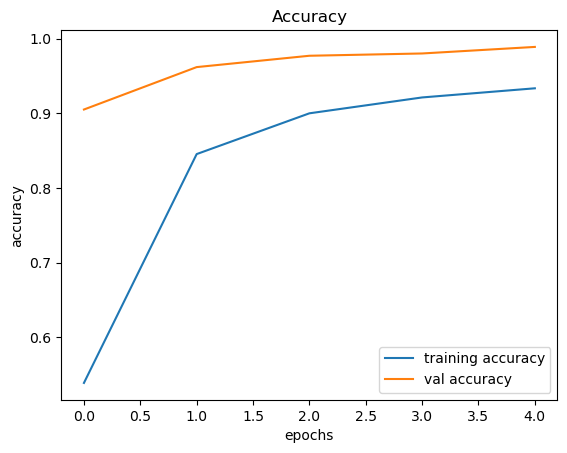

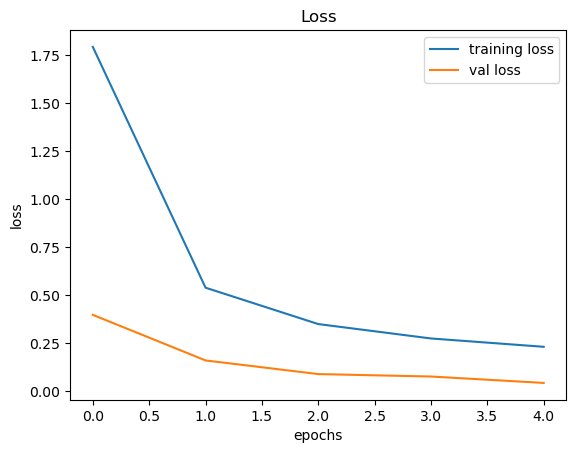

In [54]:
#Plotting training and validation accuracy of Grayscale Image CNN Model

plt.figure(0)
plt.plot(gray.history['accuracy'], label='training accuracy')
plt.plot(gray.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(gray.history['loss'], label='training loss')
plt.plot(gray.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [55]:
#Evaluate with Test Data

test_ig = gray_scale(ltest_images)
test_ig = np.array(test_ig)

GX_test = np.array(test_ig)
Gy_test = test_labels['ClassId'].values

gscore = gmodel.evaluate(GX_test, Gy_test)

395/395 [==============================] - 11s 27ms/step - loss: 25.9258 - accuracy: 0.0382


In [56]:
#make predictions with Grayscale CNN model

predictions_gray = gmodel.predict(GX_test)
gpred_class = np.argmax(predictions_gray, axis=1)
print(gpred_class)

395/395 [==============================] - 10s 25ms/step
[ 2  0  2 ...  1  8 38]


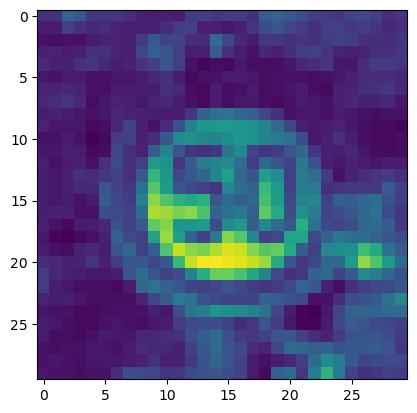

In [57]:
plt.imshow(GX_test[2])

In [58]:
#Evaluating Predictions
from sklearn.metrics import classification_report

print(classification_report(Gy_test, gpred_class))

              precision    recall  f1-score   support

           0       0.02      0.02      0.02        60
           1       0.06      0.06      0.06       720
           2       0.06      0.07      0.06       750
           3       0.04      0.04      0.04       450
           4       0.05      0.05      0.05       660
           5       0.05      0.05      0.05       630
           6       0.01      0.01      0.01       150
           7       0.03      0.03      0.03       450
           8       0.04      0.04      0.04       450
           9       0.03      0.03      0.03       480
          10       0.05      0.05      0.05       660
          11       0.03      0.03      0.03       420
          12       0.05      0.06      0.06       690
          13       0.05      0.05      0.05       720
          14       0.02      0.02      0.02       270
          15       0.02      0.02      0.02       210
          16       0.00      0.00      0.00       150
          17       0.02    

In [ ]:
#Based on the performance and evaluation of both the color and grayscale model, we can say the grayscale model has a higher accuracy and lower loss 
#and therefore is the better model

#During both the fitting and evaluation phase the training, validation and test accuracy were higher for the grayscale model

#plot compares training and validation accuracy/loss of both to visualize that the grayscale model is better
plt.figure(0)
plt.plot(gray.history['accuracy'], label='grayscale training accuracy')
plt.plot(colors.history['accuracy'], label='color training accuracy')
plt.plot(gray.history['val_accuracy'], label='grayscale val accuracy')
plt.plot(colors.history['val_accuracy'], label='color val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(gray.history['loss'], label='grayscale training loss')
plt.plot(colors.history['loss'], label='color training loss')
plt.plot(gray.history['val_loss'], label='grayscale val loss')
plt.plot(colors.history['val_loss'], label='color val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()